In [0]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

#create spark session

spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

Loading Files

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header", "true").load("s3://my-ipl-data-analysis-proj/Ball_By_Ball.csv")

In [0]:
matches_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),  # Using IntegerType for year as PySpark does not have a YearType
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmatch", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

matches_df = spark.read.schema(matches_schema).format("csv").option("header","true").load("s3://my-ipl-data-analysis-proj/Match.csv")

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://my-ipl-data-analysis-proj/Player.csv")

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(10, 2), True),  # Adjust precision and scale as needed
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),  # Use IntegerType for year
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header", "true").load("s3://my-ipl-data-analysis-proj/Player_match.csv")

In [0]:
teams_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

teams_df = spark.read.schema(teams_schema).format("csv").option("header", "true").load("s3://my-ipl-data-analysis-proj/Team.csv")

Problem Statement 1 : Player Performance Analysis

Problem: Identify the top 5 batsmen in each season based on total runs scored.

In [0]:
from pyspark.sql import Window
from pyspark.sql.functions import sum, rank, col

# Aggregate total runs scored by each batsman in each season
runs_df = ball_by_ball_df.groupBy("striker", "season").agg(sum("runs_scored").alias("total_runs"))

# Join with player data to get player names
runs_df = runs_df.join(player_df, runs_df.striker == player_df.player_sk, "inner").select("season", "player_name", "total_runs")

# Rank players within each season
window_spec = Window.partitionBy("season").orderBy(col("total_runs").desc())
runs_df = runs_df.withColumn("rank", rank().over(window_spec))

# Filter top 5 batsmen per season
top_batsmen_df = runs_df.filter(col("rank") <= 5)
top_batsmen_df.show()


+------+---------------+----------+----+
|season|    player_name|total_runs|rank|
+------+---------------+----------+----+
|  2008|    SA Asnodkar|       616|   1|
|  2008|       V Sehwag|       534|   2|
|  2008|    DJ Thornely|       514|   3|
|  2008|         M Kaif|       468|   4|
|  2008|   Pankaj Singh|       441|   5|
|  2009|     MEK Hussey|       572|   1|
|  2009|Y Venugopal Rao|       495|   2|
|  2009|      LPC Silva|       465|   3|
|  2009|       JDP Oram|       434|   4|
|  2009|       A Mishra|       418|   5|
|  2010|         U Kaul|       617|   1|
|  2010|       CL White|       572|   2|
|  2010|       JDP Oram|       528|   3|
|  2010|    BB McCullum|       493|   4|
|  2010|      SB Jakati|       458|   5|
|  2011|   MC Henriques|       604|   1|
|  2011|      JH Kallis|       557|   2|
|  2011|         U Kaul|       553|   3|
|  2011|    SA Asnodkar|       504|   4|
|  2011|       MS Dhoni|       492|   5|
+------+---------------+----------+----+
only showing top

2. Team Win Analysis

Problem: Find out which team has the highest win percentage in IPL history.

In [0]:
# Calculate total matches played by each team
matches_played_df = matches_df.groupBy("team1").agg(count("*").alias("matches_played"))

# Calculate the total matches won by each team.
matches_won_df = matches_df.groupBy("match_winner").agg(count("*").alias("matches_won"))

# Join to get win percentage
win_percentage_df = matches_played_df.join(matches_won_df, matches_played_df.team1 == matches_won_df.match_winner, "left").withColumn("win_percentage", (col("matches_won") / col("matches_played")) * 100)

win_percentage_df.show()

+--------------------+--------------+--------------------+-----------+------------------+
|               team1|matches_played|        match_winner|matches_won|    win_percentage|
+--------------------+--------------+--------------------+-----------+------------------+
| Sunrisers Hyderabad|            38| Sunrisers Hyderabad|         42| 110.5263157894737|
| Chennai Super Kings|            74| Chennai Super Kings|         79|106.75675675675676|
|     Deccan Chargers|            39|     Deccan Chargers|         29| 74.35897435897436|
|Kochi Tuskers Kerala|             7|Kochi Tuskers Kerala|          6| 85.71428571428571|
|    Rajasthan Royals|            52|    Rajasthan Royals|         63|121.15384615384615|
|       Gujarat Lions|            16|       Gujarat Lions|         13|             81.25|
|Royal Challengers...|            85|Royal Challengers...|         73| 85.88235294117646|
|Kolkata Knight Ri...|            69|Kolkata Knight Ri...|         77|111.59420289855073|
|Rising Pu

3. Man of the Match Analysis

Problem: Determine the players who have won the most "Man of the Match" awards in IPL history.

In [0]:
# Count Man of the Match awards
mom_count_df = matches_df.groupBy("manofmatch").agg(count("*").alias("mom_count"))

# Join with player data to get player names
mom_count_df = mom_count_df.join(player_df, mom_count_df.manofmatch == player_df.player_name, "inner") \
    .select("player_name", "mom_count") \
    .orderBy(col("mom_count").desc())

mom_count_df.show()

+--------------+---------+
|   player_name|mom_count|
+--------------+---------+
|      CH Gayle|       18|
|     YK Pathan|       16|
|AB de Villiers|       15|
|     DA Warner|       15|
|     RG Sharma|       14|
|      SK Raina|       14|
|     G Gambhir|       13|
|      MS Dhoni|       13|
|     AM Rahane|       12|
|    MEK Hussey|       12|
|      DR Smith|       11|
|      V Sehwag|       11|
|       V Kohli|       11|
|     JH Kallis|       10|
|     SR Watson|       10|
|    KA Pollard|        9|
|      A Mishra|        9|
|      SE Marsh|        9|
|  SR Tendulkar|        8|
|    RV Uthappa|        7|
+--------------+---------+
only showing top 20 rows



4. Bowler Performance Analysis

Problem: Find out which bowlers have taken the most wickets in each season.

In [0]:
# Filter deliveries resulting in a wicket
wickets_df = ball_by_ball_df.filter(col("out_type").isNotNull())

# Count wickets for each bowler in each season
wickets_count_df = wickets_df.groupBy("bowler", "season").agg(count("*").alias("wicket_count"))

# Join With Players to get players name
wickets_player_df = wickets_count_df.join(player_df, wickets_count_df.bowler == player_df.player_id, "inner").select("player_name","season","wicket_count")

# Rank bowlers within each season
window_spec = Window.partitionBy("season").orderBy(col("wicket_count").desc())
wickets_ranked_df = wickets_player_df.withColumn("rank", rank().over(window_spec))

#Filter top bowler
top_bowler_each_season = wickets_ranked_df.filter(col("rank") == 1) 

top_bowler_each_season.show()

+---------------+------+------------+----+
|    player_name|season|wicket_count|rank|
+---------------+------+------------+----+
|        MS Gony|  2008|         371|   1|
|       RP Singh|  2009|         382|   1|
|       A Kumble|  2010|         389|   1|
|     SL Malinga|  2011|         397|   1|
|       R Ashwin|  2012|         402|   1|
|Harbhajan Singh|  2013|         430|   1|
|       AR Patel|  2014|         403|   1|
|        A Nehra|  2015|         385|   1|
|        B Kumar|  2016|         414|   1|
|      JJ Bumrah|  2017|         373|   1|
+---------------+------+------------+----+



5. Toss Decision Impact

Problem: Analyze whether winning the toss and choosing to bat or bowl first affects the outcome of the match.

In [0]:
# Create a column indicating if toss winner won the match
matches_df = matches_df.withColumn("toss_winner_won", when(col("toss_winner") == col("match_winner"), 1).otherwise(0))

# Group by toss decision and calculate win percentage
toss_impact_df = matches_df.groupBy("toss_name").agg(
    count("*").alias("total_matches"),
    sum("toss_winner_won").alias("wins_after_toss")
).withColumn("win_percentage", (col("wins_after_toss") / col("total_matches")) * 100)

toss_impact_df.show()

+---------+-------------+---------------+------------------+
|toss_name|total_matches|wins_after_toss|    win_percentage|
+---------+-------------+---------------+------------------+
|    field|          315|            173|54.920634920634924|
|       NA|            1|              0|               0.0|
|      bat|          262|            118|45.038167938931295|
|    Field|           48|             27|             56.25|
|      Bat|           11|              6| 54.54545454545454|
+---------+-------------+---------------+------------------+



6. Venue-based Analysis

Problem: Identify the venues where teams have the highest and lowest win rates.

In [0]:
# Calculate total matches and wins at each venue for each team
venue_df = matches_df.groupBy("venue_name", "match_winner").agg(count("*").alias("wins"))

# Calculate total matches played at each venue for each team
matches_at_venue_df = matches_df.groupBy("venue_name", "team1").agg(count("*").alias("matches"))

# Join and calculate win percentage
venue_win_df = matches_at_venue_df.join(venue_df, (matches_at_venue_df.venue_name == venue_df.venue_name) & (matches_at_venue_df.team1 == venue_df.match_winner), "left") \
    .withColumn("win_percentage", (col("wins") / col("matches")) * 100)

venue_win_df.show()

+--------------------+--------------------+-------+--------------------+--------------------+----+-----------------+
|          venue_name|               team1|matches|          venue_name|        match_winner|wins|   win_percentage|
+--------------------+--------------------+-------+--------------------+--------------------+----+-----------------+
|Sheikh Zayed Stadium|Kolkata Knight Ri...|      2|Sheikh Zayed Stadium|Kolkata Knight Ri...|   1|             50.0|
|MA Chidambaram St...| Chennai Super Kings|     45|MA Chidambaram St...| Chennai Super Kings|  33|73.33333333333333|
|     SuperSport Park| Chennai Super Kings|      3|     SuperSport Park| Chennai Super Kings|   2|66.66666666666666|
|     SuperSport Park|    Delhi Daredevils|      3|     SuperSport Park|    Delhi Daredevils|   2|66.66666666666666|
|Sharjah Cricket S...|    Rajasthan Royals|      1|                null|                null|null|             null|
|    Wankhede Stadium|Royal Challengers...|      1|    Wankhede 

7. Calculate Years Since Debut

Problem: Determine the total number of years since a player did Debut

In [0]:
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

player_match_df.show()

+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|years_since_debut|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------

Some Findings through SparkSQL

In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball_table")
matches_df.createOrReplaceTempView("matches_table")
player_match_df.createOrReplaceTempView("player_match_table")
player_df.createOrReplaceTempView("player_table")
teams_df.createOrReplaceTempView("teams_table")

Impact of toss On Matches

In [0]:
toss_impact_individual_matches = spark.sql("""
select m.match_id, m.toss_winner, m.toss_name, m.match_winner,
case when m.toss_winner = m.match_winner then 'won' else 'lost' end as match_outcome
from matches_table m 
where m.toss_name is not null 
order by m.match_id
""")

toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         lost|

Doing Some Visualization On Some Analysis

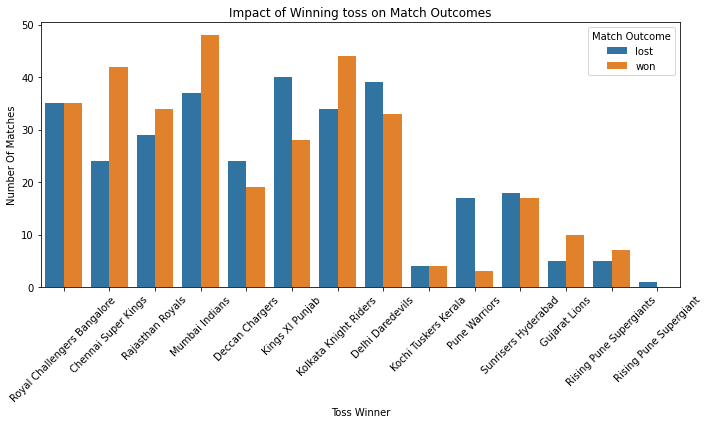

In [0]:
import matplotlib.pyplot as p
import seaborn as sns

toss_impact_pd = toss_impact_individual_matches.toPandas()

#creating a countplot to show win/loss after winning toss 
p.figure(figsize=(10,6))
sns.countplot(x='toss_winner', hue = 'match_outcome', data = toss_impact_pd)
p.title('Impact of Winning toss on Match Outcomes')
p.xlabel('Toss Winner')
p.ylabel('Number Of Matches')
p.legend(title = 'Match Outcome')
p.xticks(rotation = 45)
p.tight_layout()
p.show()

Total Scores By Venue

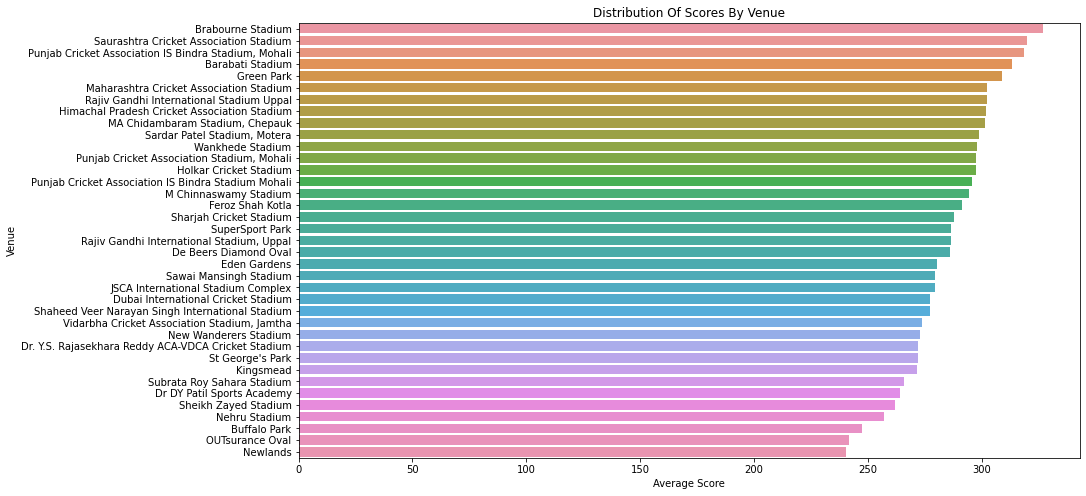

In [0]:
scores_by_venue = spark.sql("""
select venue_name , avg(total_runs) as average_score, max(total_runs) as highest_score
from (
    select b.match_id, m.venue_name, sum(runs_scored) as total_runs
    from ball_by_ball_table b
    join matches_table  m on b.match_id = m.match_id
    group by b.match_id , m.venue_name
)
group by venue_name
order by average_score desc
""")

#Convert to pandas dataframe 
scores_by_venue_pd = scores_by_venue.toPandas()

p.figure(figsize = (14,8))
sns.barplot(x='average_score', y='venue_name', data = scores_by_venue_pd)
p.title('Distribution Of Scores By Venue')
p.xlabel('Average Score')
p.ylabel('Venue')
p.show()